## Model Evaluation
### Overview
- Evaluate the Decision Tree Classifier using accuracy, precision, recall, and F1-score.
- Plot a confusion matrix.
- Visualize feature importance.

In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Load the dataset
data = pd.read_csv('../data/bank-additional-full.csv', sep=';')

# Encode categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Separate features and target
X = data.drop('y', axis=1)
y = data['y']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict on test data
y_pred = dt_classifier.predict(X_test)

# Verify shapes
print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Predictions shape:", y_pred.shape)

Training features shape: (32950, 20)
Test features shape: (8238, 20)
Predictions shape: (8238,)


### Calculating Evaluation Metrics
- Compute accuracy, precision, recall, and F1-score using scikit-learn.
- Compare `y_test` (actual) with `y_pred` (predicted).

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.8894
Precision: 0.5128
Recall: 0.5144
F1-Score: 0.5136


### Plotting a Confusion Matrix
- Use seaborn to plot a confusion matrix.
- Save the plot to `images/confusion_matrix.png`.

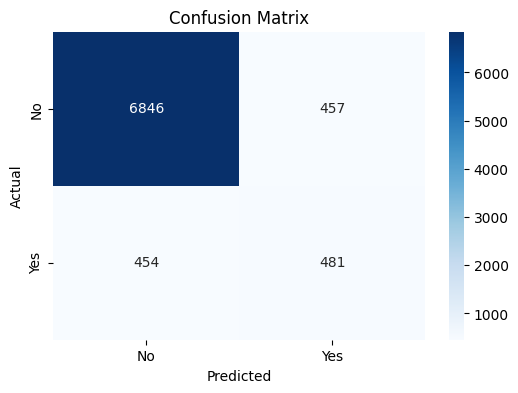

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('../images/confusion_matrix.png')  # Save to images/
plt.show()

### Visualizing Feature Importance
- Plot feature importance from the Decision Tree.
- Save the plot to `images/feature_importance.png`.

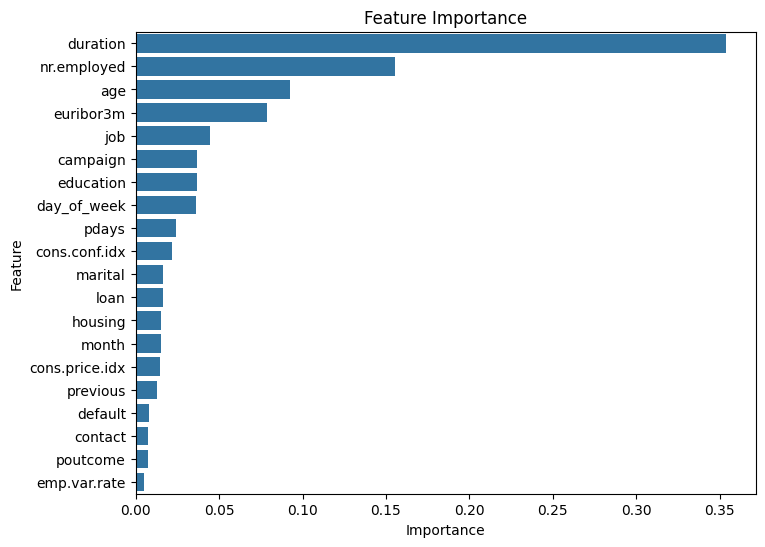

In [12]:
# Compute feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_classifier.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.savefig('../images/feature_importance.png')  # Save to images/
plt.show()